## 1) Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
sns.set()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
import umap
from sklearn.linear_model import LinearRegression, LassoCV
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import warnings
warnings.filterwarnings("ignore")
colors = ["#FF5733", "#33FFC7", "#FF33A8", "#33A8FF", "#FFCE33",
          "#33FF57", "#FF338E", "#337BFF", "#FF8E33", "#334DFF",
          "#B533FF", "#33FFCE", "#FF3333", "#33FF33", "#FF33FF"]

/home/angelo/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/angelo/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/angelo/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: Th

## 2) Exploratory Data Analysis

### Data set 

The final dataset is on a csv format, we are just going to open it and have a look at all the variables.

In [2]:
data_salary=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Graded Assignment/Final Capstone Project/v5_Latest_Data_Science_Salaries.csv")

In [3]:
data_salary.shape

(3951, 11)

The data has records of 3951 data sciences jobs with salaries depending on 10 specific variables. Let us have a look at all the variables we have.

In [4]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3951 non-null   object
 1   Employment Type     3951 non-null   object
 2   Experience Level    3951 non-null   object
 3   Expertise Level     3951 non-null   object
 4   Salary              3951 non-null   int64 
 5   Salary Currency     3951 non-null   object
 6   Company Location    3951 non-null   object
 7   Salary in USD       3951 non-null   int64 
 8   Employee Residence  3951 non-null   object
 9   Company Size        3951 non-null   object
 10  Year                3951 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 339.7+ KB


The independant variables are: Job title, employment type, Experience Level, Company Location, Employee Residence,Company Size, salary currency and Year.
With the dependant variable being salary and its variants.\
Now let's dive into the dataset and look at the data set in more details

In [5]:
data_salary.head(5)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Staff Data Analyst,Contract,Entry,Junior,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,Junior,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,Expert,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,Expert,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Medium,2023


We can first and foremost see that, data science jobs include not only data science or data engineer, but others job titles such as data analyst, AI engineer, AI developper, Machine learning engineer and so on.

In [6]:
data_salary.describe()

,Salary,Salary in USD,Year
count,3.951000e+03,3951.000000,3951.000000
mean,1.982900e+05,142753.106808,2022.576816
std,6.725310e+05,68281.388301,0.682222
min,1.400000e+04,15000.000000,2020.000000
25%,9.500000e+04,92280.000000,2022.000000
50%,1.400000e+05,136600.000000,2023.000000
75%,1.898750e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


We got some insights here:
1) The minimum salary in USD is 15000 dollars whereas the highest data sciencesalary is USD 450,000 (which is almost 1/2 a million dollar). While the average salary is 142,753 dollars. 
2) The majority of data science salaries have been recorded for the year 2023  
#### Now let's analyse and visualize each variable in details, as well as their realtionship with other variables and their impact on data science salaries.

### Cleaning data : missing values and outliers

In [7]:
data_salary.isna()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3946,False,False,False,False,False,False,False,False,False,False,False
3947,False,False,False,False,False,False,False,False,False,False,False
3948,False,False,False,False,False,False,False,False,False,False,False
3949,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data_salary.isnull().sum()*100/len(data_salary)

Job Title             0.0
Employment Type       0.0
Experience Level      0.0
Expertise Level       0.0
Salary                0.0
Salary Currency       0.0
Company Location      0.0
Salary in USD         0.0
Employee Residence    0.0
Company Size          0.0
Year                  0.0
dtype: float64

Well, there is no missing values. we can the continue to the next steps of our analysis.

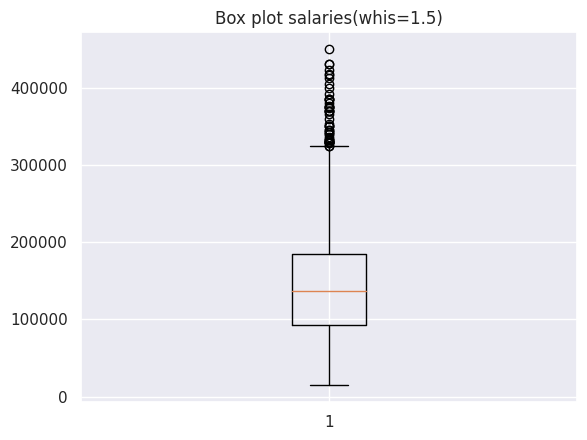

In [9]:
plt.boxplot(data_salary["Salary in USD"])
plt.title("Box plot salaries(whis=1.5)")
plt.savefig('im1.png')
plt.show()

We probaly got an important number of outliers in salaries. But before  elamination or validating the outliers, we will continue to explore our data in more details.

### Data exploration and visualization

In [10]:
data_salary.head(5)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Staff Data Analyst,Contract,Entry,Junior,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,Junior,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,Expert,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,Expert,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Medium,2023


##### Distribution of Salary

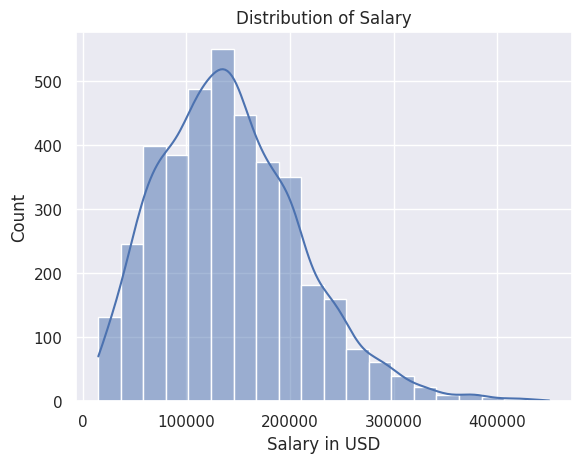

In [11]:
sns.histplot(data_salary['Salary in USD'],bins=20,kde=True)
plt.title("Distribution of Salary")
plt.savefig('im2.png')
plt.show()

The distribution of salary seems to follow a normal distribution, but is a bit skewed to the right. Let's confirm our normallity assumption with some statistical test.

In [12]:
print(stats.describe(data_salary['Salary in USD']))

DescribeResult(nobs=3951, minmax=(15000, 450000), mean=142753.10680840292, variance=4662347988.297957, skewness=0.6495788963672379, kurtosis=0.5845982978307349)


With kweness and kurtosis both values between -3 and 3, the predicting variable seems to be close to normally distributed. Let's push forward our statistical analysis.

In [13]:
stats.jarque_bera(data_salary['Salary in USD'])

SignificanceResult(statistic=334.1173258385421, pvalue=2.8012027241544886e-73)

1) The test statistic is 334 and the corresponding p-value is almost 0. The p-value is less than 0.05, we can say that there is a significance difference between the distribution of the salary in USD and the normal distribution.
2) Now we have sufficient evidence to say that this data has skewness and kurtosis which is different from a normal distribution.

##### Conclusion: The "Salary in USD" variable is not normally distributed but is close to be normally distributed.

#### What is the maximum job salary and the minimum job salary?

In [14]:
data_salary[data_salary["Salary in USD"]==data_salary["Salary in USD"].max()]

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
3736,Research Scientist,Full-Time,Mid,Intermediate,450000,United States Dollar,United States,450000,United States,Medium,2020


The highest salary in the Data science field is for a Mid senior Research scientist, working in the United States for a company in the United States in 2020.

In [15]:
data_salary[data_salary["Salary in USD"]==data_salary["Salary in USD"].min()]

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
998,Business Intelligence Developer,Full-Time,Mid,Intermediate,15000,United States Dollar,Ghana,15000,Ghana,Medium,2022
2050,Staff Data Analyst,Full-Time,Executive,Director,15000,United States Dollar,Canada,15000,Nigeria,Medium,2020
3292,Machine Learning Developer,Full-Time,Entry,Junior,15000,United States Dollar,Thailand,15000,Thailand,Large,2021
3477,Data Analyst,Full-Time,Entry,Junior,15000,United States Dollar,Indonesia,15000,Indonesia,Large,2022


Minimum salaries have been found in company based in Ghana, Canada, Thailand and Indonesia.

#### Univariate exploration

##### Salaries trend in USD

In [16]:
data_salary["Salary in USD"].value_counts()

100000    61
150000    55
200000    54
120000    51
160000    45
          ..
100416     1
280100     1
168100     1
274450     1
94665      1
Name: Salary in USD, Length: 1517, dtype: int64

Most data science employees (61) have an annual salary of 100,000 dollars, closely followed by 120,000 dollars, 200,000 dollars and 150,000 dollars.

##### Employment type

In [17]:
data_salary["Employment Type"].value_counts()

Full-Time    3909
Contract       18
Part-Time      13
Freelance      11
Name: Employment Type, dtype: int64

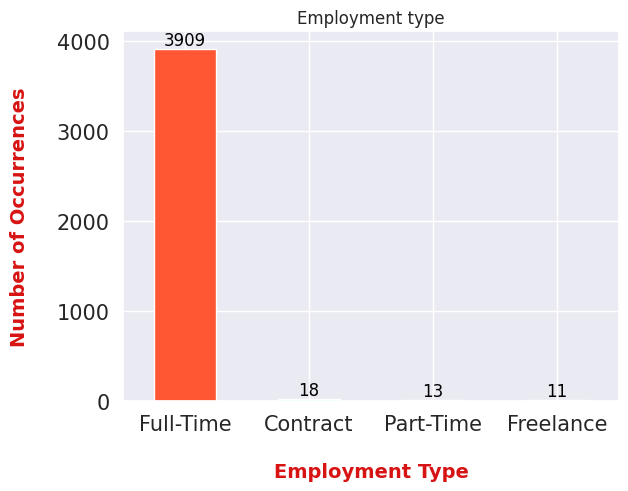

In [18]:
ax = data_salary["Employment Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Full-Time', 'Contract', 'Part-Time', 'Freelance'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.title("Employment type")
plt.savefig('im3.png')
plt.show()

 Most jobs are full time ( which kind of makes sense because everyone wants to be fully decicated for the company they work for), with only a few one that are contracts, part time and freelance)

##### Experience level and company size

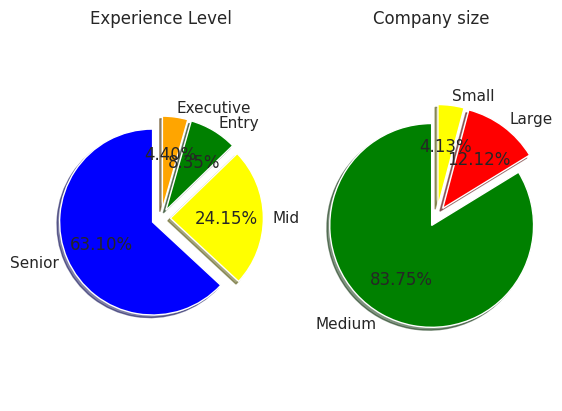

In [19]:
plt.subplot(1,2,1)
labels= list(data_salary["Experience Level"].value_counts().index)

colors=['blue', 'yellow', 'green', 'orange']
#colors=['blue','orange']
sizes= list(data_salary["Experience Level"].value_counts().values)
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1,0.1,0.1), autopct='%1.2f%%')
plt.title('Experience Level')
plt.axis('equal')


plt.subplot(1,2,2)
labels= list(data_salary["Company Size"].value_counts().index)

colors=['green', 'red', 'yellow']
#colors=['blue','orange']
sizes= list(data_salary["Company Size"].value_counts().values)
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1,0.1), autopct='%1.2f%%')
plt.title('Company size')
plt.axis('equal')
plt.savefig('img4.png')
plt.show()

From the chart below, we get the following information:
1) Most data science workers are seniors/Experts with about 63%.Followed by mid-seniors/Intermediate ( 24%), Entry/Junior (8%) and finally executive.
2) The majority of companies have a medium size, with a few of them being small startups
3) With that being said, applying only for jobs in Large companies might no be the best way to start a data science career since Large companies represent only 12% of the total number of companies.

##### Year

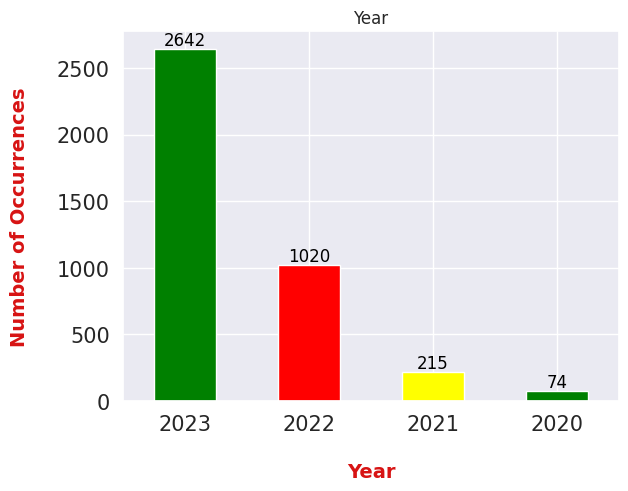

In [20]:
ax = data_salary["Year"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('2023', '2022', '2021', '2020'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Year', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.title('Year')
plt.savefig('img5.png')
plt.show()

As already said from the description, most jobs have recorded in the year 2023. That shows that the number of jobs in the Data science field is increasing every year.

##### Job titles

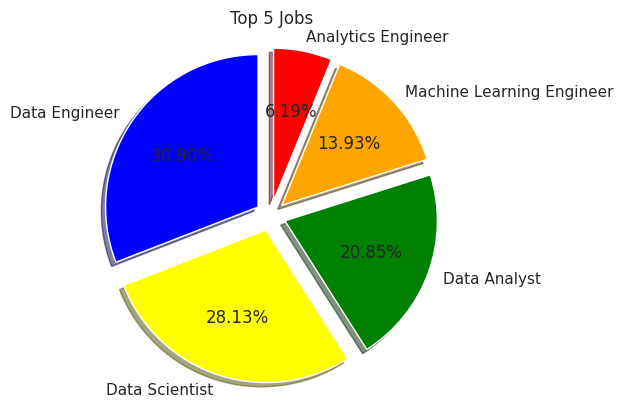

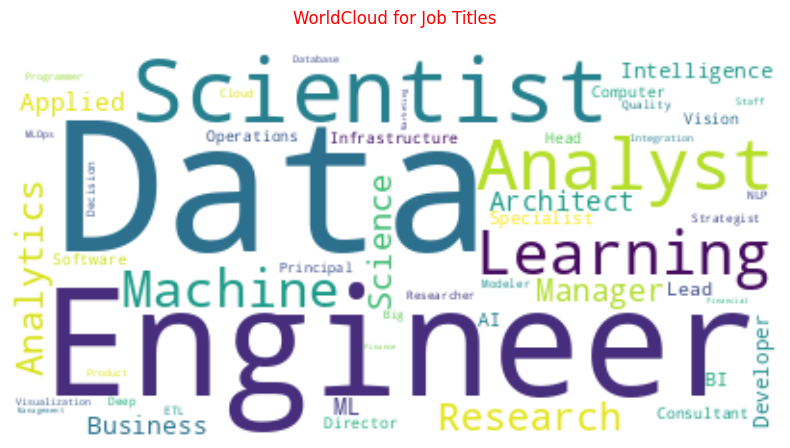

In [21]:
labels= list(data_salary["Job Title"].value_counts()[:5].index)
colors=['blue', 'yellow', 'green', 'orange','red']
sizes= list(data_salary["Job Title"].value_counts()[:5].values)
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1,0.1,0.1,0.1), autopct='%1.2f%%')
plt.title('Top 5 Jobs')
plt.axis('equal')
plt.figure(figsize = (10, 5))
text = " ".join(title for title in data_salary["Job Title"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('WorldCloud for Job Titles\n', fontsize = 12, color = "#FF0000")
plt.savefig('img6.png')
plt.show()

Interesting facts here:
1) Most workers in the Data Science field are Data Engineers.
2) The top 5 is completed by Data Scientists, Data Analyst, Machine learning Engineer and Analytics Engineer.
3) This kind of gives an idea of what have been the most in demand Data science jobs in the market for the past three yeras.

##### Company location and employment residence

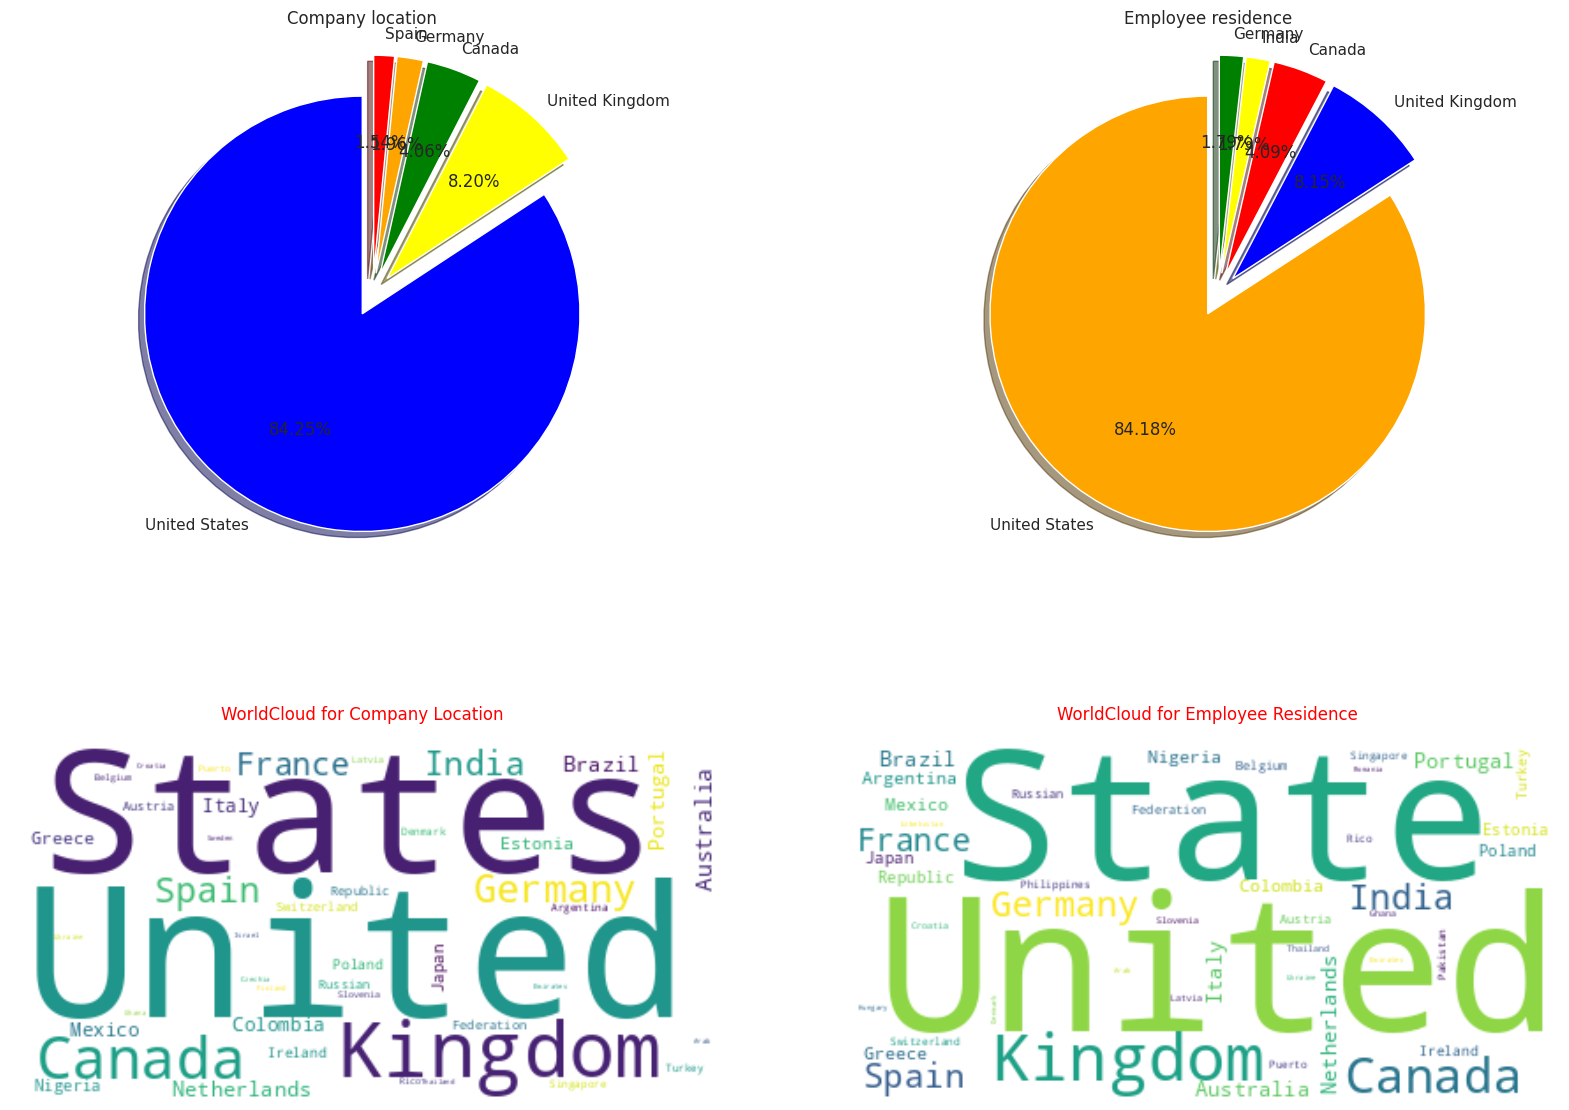

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
labels= list(data_salary["Company Location"].value_counts()[:5].index)
colors=['blue', 'yellow', 'green', 'orange','red']
sizes= list(data_salary["Company Location"].value_counts()[:5].values)
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1,0.1,0.1,0.1), autopct='%1.2f%%')
plt.title('Company location')
plt.axis('equal')

plt.subplot(2,2,2)
labels= list(data_salary["Employee Residence"].value_counts()[:5].index)
colors=['orange', 'blue', 'red','yellow', 'green']
sizes= list(data_salary["Employee Residence"].value_counts()[:5].values)
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1,0.1,0.1,0.1), autopct='%1.2f%%')
plt.title('Employee residence')
plt.axis('equal')

plt.subplot(2,2,3)
text = " ".join(title for title in data_salary["Company Location"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('WorldCloud for Company Location\n', fontsize = 12, color = "#FF0000")

plt.subplot(2,2,4)
text = " ".join(title for title in data_salary["Employee Residence"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('WorldCloud for Employee Residence\n', fontsize = 12, color = "#FF0000")
plt.savefig('im7.png')
plt.show()

1) No surprise here: Most companies (84%) are located in the United states. United kingdom, Canada, Germany and Spain complete the top 5.
2) With no country from Asiain the top 5, this gives a pretty much interesting insight.
3) Again, most data science workers are located in the United States. With United kingdom, Canada, India and Germnay completing the top 5.

#### Biivariate exploration

In [23]:
data_salary.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Staff Data Analyst,Contract,Entry,Junior,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,Junior,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,Expert,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,Expert,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Medium,2023


##### Comparing the salaries for each of the top 5 jobs

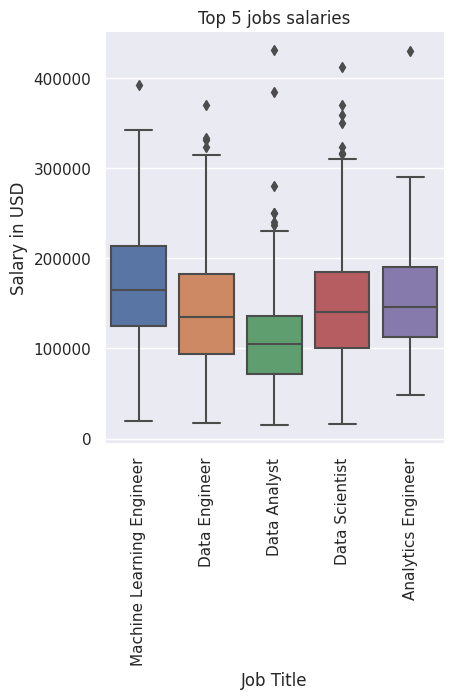

In [24]:
L=list(data_salary["Job Title"].value_counts().index[:5])
D1=data_salary[(data_salary["Job Title"]==L[0]) | (data_salary["Job Title"]==L[1]) | (data_salary["Job Title"]==L[2])
            | (data_salary["Job Title"]==L[3])| (data_salary["Job Title"]==L[4]) ]
sns.catplot(D1, x="Job Title", y="Salary in USD", kind="box")
plt.xticks(rotation=90)
plt.title('Top 5 jobs salaries')
plt.savefig('im8.png')
plt.show()

1) Machine learning engineer tend to have the highest salary overall.
2) Analyst Engineers, Data scientists and Data engineer pretty much have the same average salary
3) Data Analysts earn less than other job titles but still with an average above USD 100,000.
4) "Job title" seems to be important and show and important variance with respect to salary. Therefore,we will keep that variable in our model.

##### Salary with respect to experience level

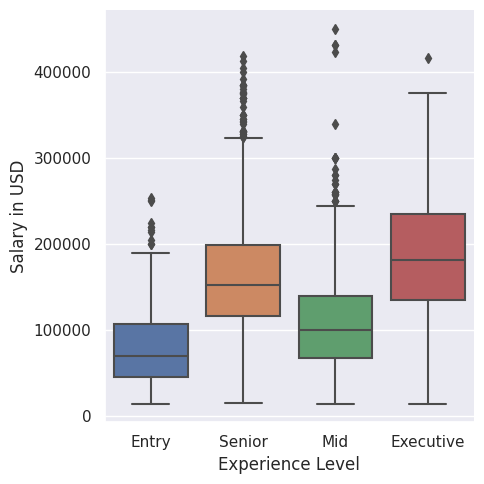

In [25]:
sns.catplot(data_salary, x="Experience Level", y="Salary in USD", kind="box")

1) This was expected: Entry levels have the lowest salary and Executive have the highest salary.
2) "Experience level" seems to be important and show and important variability with respect to salary. Therefore, we will keep that variable in our model.

##### How does company size impact the salary

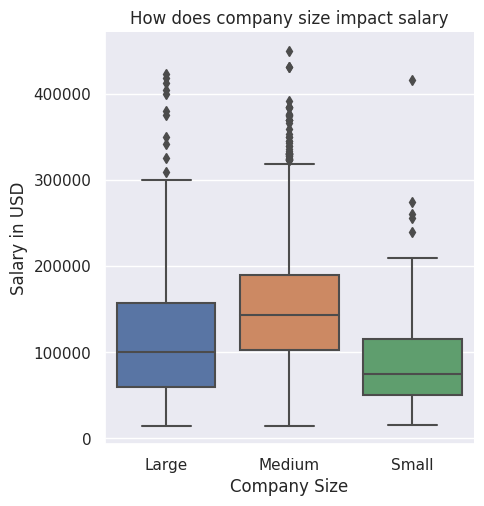

In [26]:
sns.catplot(data_salary, x="Company Size", y="Salary in USD", kind="box")
plt.title('How does company size impact salary')
plt.savefig('im9.png')
plt.show()

1) THis is an interesting fact: Medium size companies pay more than large companies. This might be because medium companies have less data science workers and therefore increase their salaries.
2) "Company size" seems to be important and show and important variance with respect to salary. Therefore,we will keep that variable in our model.

#### How are data science salaries changing over the years?

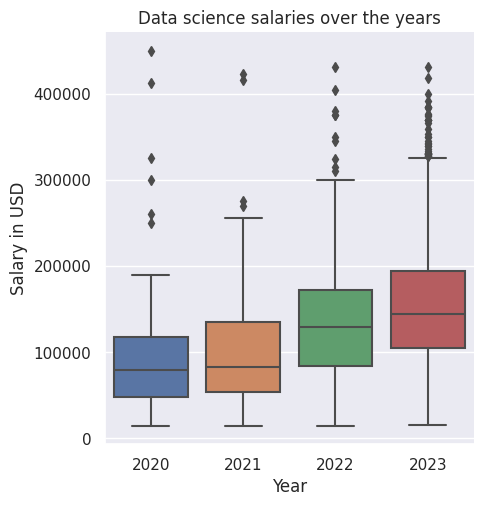

In [27]:
sns.catplot(data_salary, x="Year", y="Salary in USD", kind="box")
plt.title('Data science salaries over the years')
plt.savefig('im10.png')
plt.show()

1) The information we get from the chart above is that: Data science salaries are increasing over the years. The world of today rely so much on data and Data scientists are now key elements into the success of every company, therefore this explains the increase of data science salaries.
2) "Year" seems to be important and show and important variance with respect to salary. Therefore,we will keep that variable in our model.

##### How is the average data science salary in USD for each of the top countries

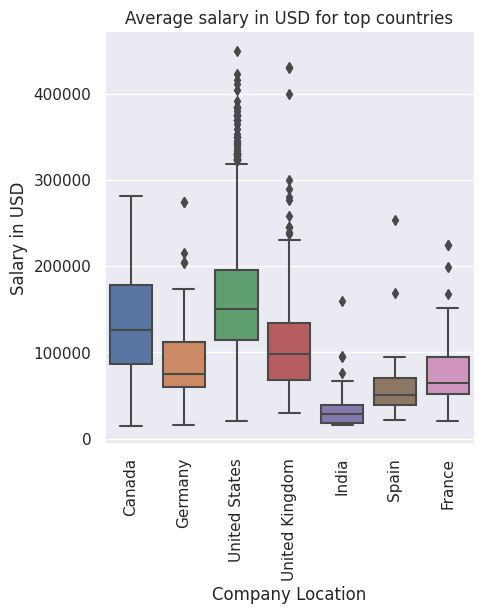

In [28]:
L2=list(data_salary["Company Location"].value_counts().index[:7])
D2=data_salary[(data_salary["Company Location"]==L2[0]) | (data_salary["Company Location"]==L2[1]) | (data_salary["Company Location"]==L2[2])
            | (data_salary["Company Location"]==L2[3])| (data_salary["Company Location"]==L2[4]) | 
               (data_salary["Company Location"]==L2[5])| (data_salary["Company Location"]==L2[6]) ]
sns.catplot(D2, x="Company Location", y="Salary in USD", kind="box")
plt.xticks(rotation=90)
plt.title('Average salary in USD for top countries')
plt.savefig('im11.png')
plt.show()

1) Companies in the United states overall, pay more their Data Scientists than any other country.
2) Canada and the United Kingdom pay on average above USD 100,000 to their employees.
3) "Company Location" seems to be important and show and important variance with respect to salary. Therefore,we will keep that variable in our model.

#### Multivariate analysis

In [29]:
data_salary.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Staff Data Analyst,Contract,Entry,Junior,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,Junior,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,Expert,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,Expert,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Medium,2023


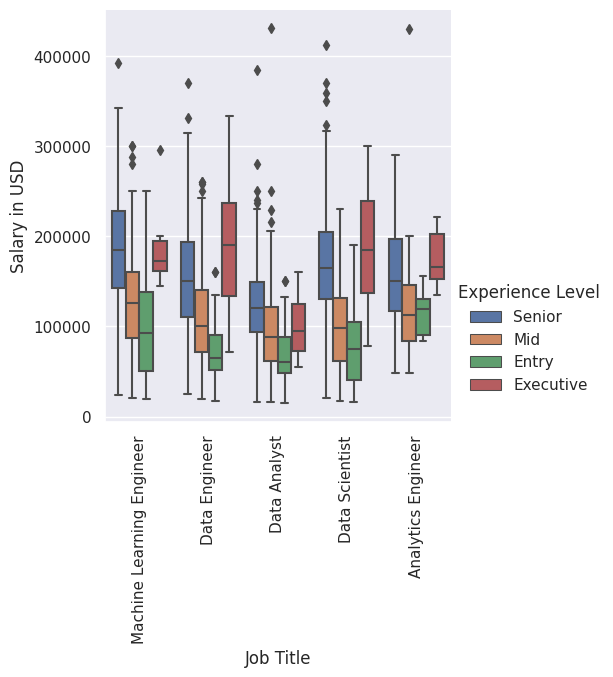

In [30]:
sns.catplot(data=D1, x="Job Title", y="Salary in USD", hue="Experience Level", kind="box")
plt.xticks(rotation=90)
plt.show()

1) Even tough machine learning engineers earn more overall, Executive Data Scientist and Data Engineers earn more than Executive Machine learning engineers.

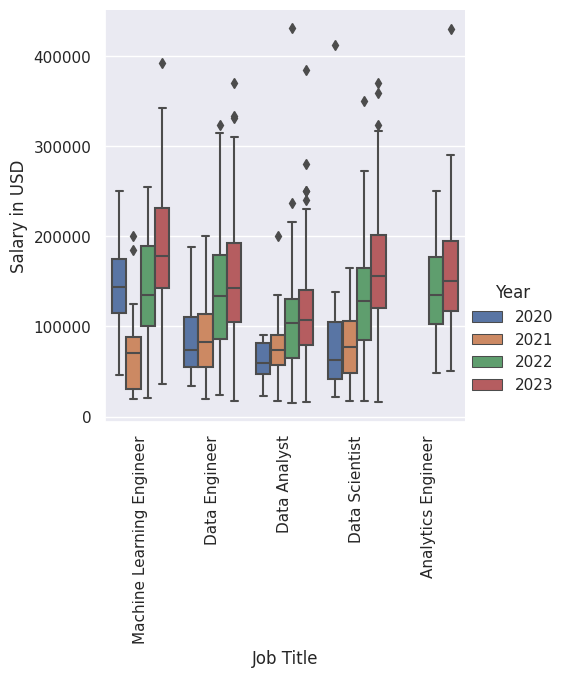

In [31]:
sns.catplot(data=D1, x="Job Title", y="Salary in USD", hue="Year", kind="box")
plt.xticks(rotation=90)
plt.show()

1) From 2020 to 2021, Machine Learning engineer seem the have a massive drop down when it comes to average salary. But from 2022, continued to be the most paid Data science field job

### Feature Engineering

1) All predicting variables are non numerical and we do need to change the ones we plan on using to numerical before going further.
2) The variables that show some important variability with respect to the salary in USD are: Job Title, Experience Level, Expertise Level, Company Location, Company Size and Year.
3) Experience Level and Expertise level kind of represent the same variable and we are going to keep only Experience Levelf or our analysis 
##### To conclude to keep:  Job Title, Experience Level, Company Location, Company Size and Year.

In [32]:
data2=data_salary.copy()
data2=data2.drop(['Employment Type','Expertise Level','Salary Currency','Salary','Employee Residence'],axis=1)

#### Changing features from non numerical to numerical

Encoding non numerical data to numerical data ease our model prediction steps since non numerical data are not accepted by most machine learning algorithms, below is how we are going to handle the variables

#### Handling ordinal data: Experience Level and Company Size

Ordinal data (such as experience level and company size) can be ranked or ordered to show distinctions between values. We therefore use an ordinal encoder to encode them.

In [33]:
name = [['Entry', 'Mid', 'Senior', 'Executive'],
        ['Small', 'Medium', 'Large']]

ordinal= OrdinalEncoder(categories = name)
data2[['Experience Level', 'Company Size']] = ordinal.fit_transform(data2[['Experience Level','Company Size']])


#### Handling nominal data: Job title and Company Location

In [34]:
names = ['Job Title', 'Company Location']

hotenc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoded = pd.DataFrame(hotenc.fit_transform(data2[names]), 
                                columns = hotenc.get_feature_names_out(names))
encoded.index = data2.index
data2 = data2.drop(names, axis = 1)
data2 = pd.concat([data2, encoded], axis = 1)
data2

,Experience Level,Salary in USD,Company Size,Year,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Engineer,Job Title_AI Programmer,Job Title_AI Research Engineer,Job Title_AI Scientist,...,Company Location_South Africa,Company Location_Spain,Company Location_Sweden,Company Location_Switzerland,Company Location_Thailand,Company Location_Turkey,Company Location_Ukraine,Company Location_United Arab Emirates,Company Location_United Kingdom,Company Location_United States
0,0.0,44753,2.0,2020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,35000,1.0,2023,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,53984,0.0,2023,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,226600,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,140100,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,2.0,412000,2.0,2020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3947,1.0,151000,2.0,2021,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3948,0.0,105000,0.0,2020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3949,0.0,100000,2.0,2020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Time series trend of Data science salaries over the years

In [122]:
DAT=data_salary[['Year','Salary in USD']].groupby('Year').mean()

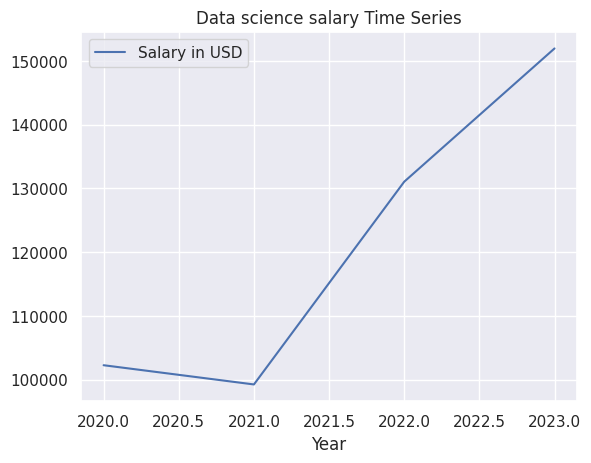

In [123]:
DAT.plot()
plt.title('Data science salary Time Series')
plt.show()

#### On average, data science average salaries have increase from just above UDS 100,000 in 2020 to above UDS 150,000 in 2023

## 3) Model definition

#### Splitting the data into training set and test set

In [35]:
X=data2.drop('Salary in USD',axis=1)
y=data2['Salary in USD']

##### Removing outliers

In [36]:
from scipy.stats.mstats import winsorize
y = winsorize(y, (0, 0.015))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8860469e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f886046ba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f886046a800>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8860468940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f88604684f0>],
 'means': []}

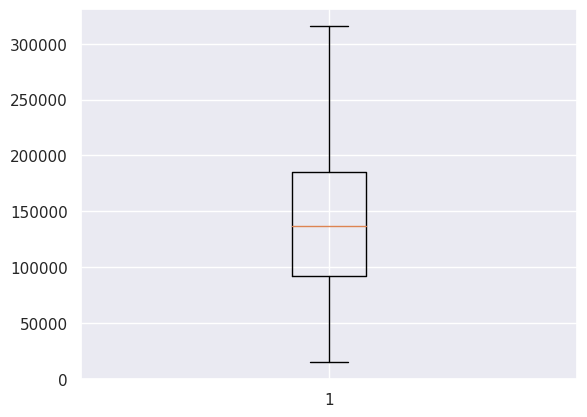

In [37]:
plt.boxplot(y)

In [80]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 465)

##### With our data split into train set and test set, let start by building a simple linear regression model with Lasso as regularizer

In [81]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 100.0
R-squared of the model in training set is: 0.41575254763674774
-----Test set statistics-----
R-squared of the model in test set is: 0.4250659998772722
Mean absolute error of the prediction is: 40008.348215720835
Mean squared error of the prediction is: 2553577572.048539
Root mean squared error of the prediction is: 50532.93551782381
Mean absolute percentage error of the prediction is: 36.428507932143525


1) A root mean square error of around 50,000 shows that on average our predictions are 50,000 dollars away from the original salary.
2) That is  good start but let dive deep into it and create a more complicated deep learning model.

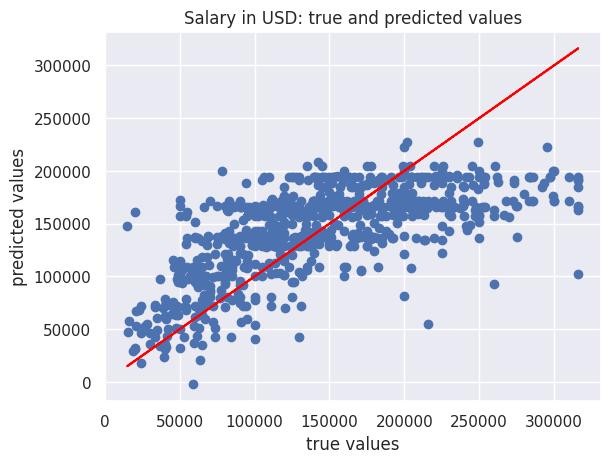

In [165]:
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Salary in USD: true and predicted values")
plt.savefig('im13.png')
plt.show()

#### Randomly prediction

1) Because I intend to be working for a company in 2024, what will be the price of an entry level data scientist based in USA and working for a company in the USA in 2024. The company is a medium size company?

In [94]:
# Finding the index of the Data scientist Job title
X_test.columns[67]
A=np.zeros(195)
A[0]=0 # Experience level: Entry
A[1]=1 # company size: Medium
A[2]=2024 # year
A[-1]=1 # company located in the USA
A[67]=1 # Job title: Data scientist

In [98]:
predicted_salary=lasso_cv.predict(A.reshape(1,195))
print("The predicted salary of an entry level data scientist in 2024 working in a medium company in the USA is: USD",predicted_salary[0 ])

The predicted salary of an entry level data scientist in 2024 working in a medium company in the USA is: USD 123079.61449282616


#### Deep Learning Model

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time

In [85]:
X_train.shape[1]

195

#### We have two type of activations we can use: linear and relu, but because the salary is supposed to be always positive, we will use only the relu activation function 
####  we will try the two optimizers:  Adam and rmsprop
#### we will also play with the number of layers, number of neurons batch size and number of epochs to really tune our model

In [92]:
# Define the hyperparameters
batch_size = 5
nb_epoch = 20

##### rmsprop optimizer

In [93]:
# Define the model
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) 
model.add(Dense(1000, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='relu')) 
print(model.summary())
et=time.time()
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1)
t=time.time()-et
print("execution time:",t, "seconds")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1000)              196000    
                                                                 
 dense_22 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_23 (Dense)            (None, 250)               250250    
                                                                 
 dense_24 (Dense)            (None, 1)                 251       
                                                                 
Total params: 1,447,501
Trainable params: 1,447,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
632/632 [==============================] - 7s 10ms/step - loss: 4853709824.0000 - mse: 4853709824.0000
Epoch 2/20
632/632 [==============================] - 6s 

####  Evaluation of predicting error

In [99]:
pred = model.predict(X_test)

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print('train error is:',np.sqrt(mean_squared_error(y_train, trainpreds))) 
print('test error is:', np.sqrt(mean_squared_error(y_test,pred)))

train error is: 58469.53679050481
test error is: 57321.954054940776


##### Adam optimizer

In [100]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) 
model.add(Dense(1000, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='relu')) 
print(model.summary())
et=time.time()
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1)
t=time.time()-et
print("execution time:",t, "seconds")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1000)              196000    
                                                                 
 dense_26 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_27 (Dense)            (None, 250)               250250    
                                                                 
 dense_28 (Dense)            (None, 1)                 251       
                                                                 
Total params: 1,447,501
Trainable params: 1,447,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
632/632 [==============================] - 4s 7ms/step - loss: 5165031424.0000 - mse: 5165031424.0000
Epoch 2/20
632/632 [==============================] - 4s 6

#### Evaluation of predicting error

In [101]:
pred = model.predict(X_test)

trainpreds = model.predict(X_train)

print('train error is:',np.sqrt(mean_squared_error(y_train, trainpreds))) 
print('test error is:', np.sqrt(mean_squared_error(y_test,pred)))

train error is: 51585.07156330103
test error is: 51230.314142670366


##### Adam optimizer performs overall better than rmsprop optimzer. Then the second model is the one we chose. Next, let us compare the predicted values and the actual values to see how close they are

#### Predicted vs Actual 

In [102]:
predictions = pd.DataFrame({
    'id': X_test.index,
    'Salary in USD': y_test,
    'Predicted Salary': pred.reshape(791)
})
predictions

,id,Salary in USD,Predicted Salary
0,534,208450,194342.453125
1,481,185000,194342.453125
2,1162,114700,132421.187500
3,1388,204500,196977.296875
4,746,165600,141750.421875
...,...,...,...
786,3339,19073,56370.007812
787,1309,50000,173139.859375
788,3265,113000,134761.906250
789,3398,175000,134761.906250


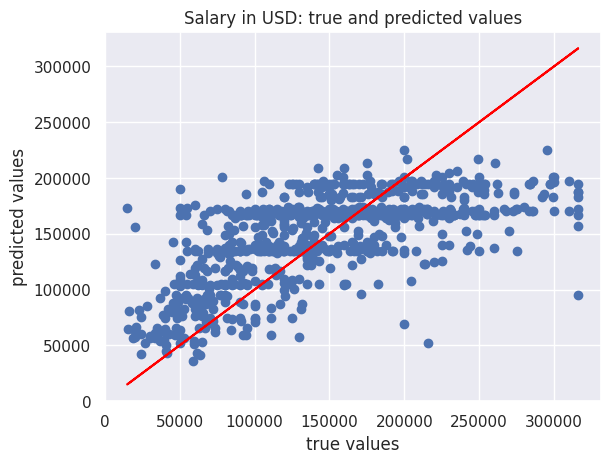

In [103]:
plt.scatter(y_test, pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Salary in USD: true and predicted values")
plt.show()

#### Randomly prediction

1) Because I intend to be working for a company in 2024, what will be the price of an entry level data scientist based in USA and working for a company in the USA in 2024. The company is a medium size company?

In [104]:
X_test.head(2)

,Experience Level,Company Size,Year,Job Title_AI Architect,Job Title_AI Developer,Job Title_AI Engineer,Job Title_AI Programmer,Job Title_AI Research Engineer,Job Title_AI Scientist,Job Title_AWS Data Architect,...,Company Location_South Africa,Company Location_Spain,Company Location_Sweden,Company Location_Switzerland,Company Location_Thailand,Company Location_Turkey,Company Location_Ukraine,Company Location_United Arab Emirates,Company Location_United Kingdom,Company Location_United States
534,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
481,2.0,1.0,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [105]:
# Finding the index of the Data scientist Job title
X_test.columns[67]

'Job Title_Data Scientist'

In [106]:
A=np.zeros(195)
A[0]=0 # Experience level: Entry
A[1]=1 # company size: Medium
A[2]=2024 # year
A[-1]=1 # company located in the USA
A[67]=1 # Job title: Data scientist

In [107]:
predicted_salary=model.predict(A.reshape(1,195))
print("The predicted salary of an entry level data scientist in 2024 working in a medium company in the USA is: USD",predicted_salary[0][0] )

The predicted salary of an entry level data scientist in 2024 working in a medium company in the USA is: USD 109839.766


#### Further tuning parameters steps with Adam optimizer

In [109]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) 
model.add(Dense(1000, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='relu')) 
print(model.summary())
et=time.time()
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(X_train, y_train, batch_size=5, epochs=30, verbose=1)
t=time.time()-et
print("execution time:",t, "seconds")

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1000)              196000    
                                                                 
 dense_34 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_35 (Dense)            (None, 250)               250250    
                                                                 
 dense_36 (Dense)            (None, 1)                 251       
                                                                 
Total params: 1,447,501
Trainable params: 1,447,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
632/632 [==============================] - 4s 6ms/step - loss: 5093223424.0000 - mse: 5093223424.0000
Epoch 2/30
632/632 [==============================] - 4s 6

In [110]:
pred = model.predict(X_test)
trainpreds = model.predict(X_train)
print('train error is:',np.sqrt(mean_squared_error(y_train, trainpreds))) 
print('test error is:', np.sqrt(mean_squared_error(y_test,pred)))

train error is: 59476.4880568069
test error is: 59987.70024350701


In [112]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) 
model.add(Dense(1000, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu')) 
print(model.summary())
et=time.time()
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(X_train, y_train, batch_size=5, epochs=20, verbose=1)
t=time.time()-et
print("execution time:",t, "seconds")

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 1000)              196000    
                                                                 
 dense_43 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_44 (Dense)            (None, 250)               250250    
                                                                 
 dense_45 (Dense)            (None, 100)               25100     
                                                                 
 dense_46 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,472,451
Trainable params: 1,472,451
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
632/632 [==================

In [113]:
pred = model.predict(X_test)
trainpreds = model.predict(X_train)
print('train error is:',np.sqrt(mean_squared_error(y_train, trainpreds))) 
print('test error is:', np.sqrt(mean_squared_error(y_test,pred)))

train error is: 54277.10117890033
test error is: 53738.041222427855


1) Increasing the number of epochs or the batch size is not going to be more valuable for the model.
2) Adding the number of neurons does not seems to have a better performance either.

#### Conclusion on the model
1) We implemented a simple linear regression model with Lasso as regularizer and deep learning models with different types of optimizers and activations function
2) Event tough the best deep learning model performer is with Adam optimizer and relu activation fucntion, it does not outperforms the Lasso model, whose performance gives an error of 50,000. That  error means that overall, the model the model data science salaries prediction  is USD 50,000 away from the exact prediction. Which is a pretty satisfactory results
3) However the random prediction made with the deep learning model is closer to reality than the one made with the lasso model

## 4) Next steps: Can we improve the performance of our model?

#### After doing some tuning parameter steps, we ended up with simple linear regression with Lasso as regularizer being the best model. However, in the next steps, we are going to try many different algorithms such as Decision trees, randon forest and Boosting to see how their overall performance and if the perform better than SLR.

#### Decision Trees

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree
# A convenience for displaying visualizations
from IPython.display import Image
# Packages for rendering the tree
import pydotplus
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [60]:
X=data2.drop('Salary in USD',axis=1)
y=data2['Salary in USD']
from scipy.stats.mstats import winsorize
y = winsorize(y, (0, 0.015))
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 465)

In [68]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [69]:
trainpred1 = regr_1.predict(X_train)
trainpred2 = regr_2.predict(X_train)
print('train error for max_depth=2 is:',np.sqrt(mean_squared_error(y_train, trainpred1))) 
print('test error for max_depth=2 is:', np.sqrt(mean_squared_error(y_test,y_1)))
print('train error for max_depth=5 is:',np.sqrt(mean_squared_error(y_train, trainpred2))) 
print('test error for max_depth=5 is:', np.sqrt(mean_squared_error(y_test,y_2)))

train error for max_depth=2 is: 56694.453020050096
test error for max_depth=2 is: 55574.1627485096
train error for max_depth=5 is: 51948.706250679395
test error for max_depth=5 is: 52556.41606522187


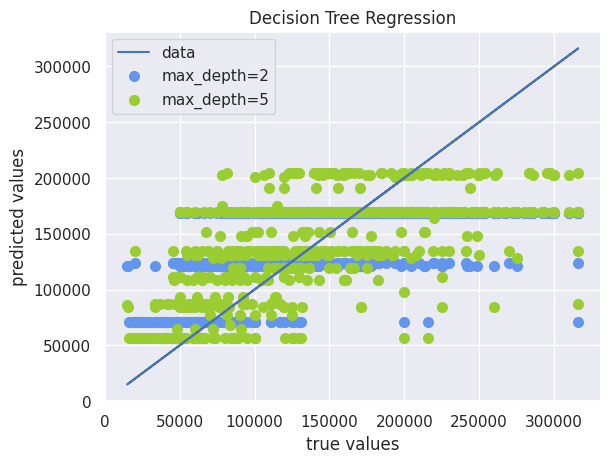

In [63]:
# Plot the results
plt.figure()
plt.plot(y_test, y_test, label="data")
plt.scatter(y_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.scatter(y_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

##### Decision trees overall does not outperforms SLR with Lasso Regularizer. Now let us look at Random forest

#### Random Forest

In [93]:
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [94]:
pred = rfr.predict(X_test)
trainpreds = rfr.predict(X_train)
print('train error is:',np.sqrt(mean_squared_error(y_train, trainpreds))) 
print('test error is:', np.sqrt(mean_squared_error(y_test,pred)))

train error is: 43972.17056272887
test error is: 52750.785250662346


##### Despite producing the best result on the training set, random forest gives a higher test error, which is a sign of overfitting. Our data set currently has 196 features and probably, not all of them are relevant for the random forest model. We will get an initial sense of how many of the features are unimportant by examining the feature importances.

<AxesSubplot:>

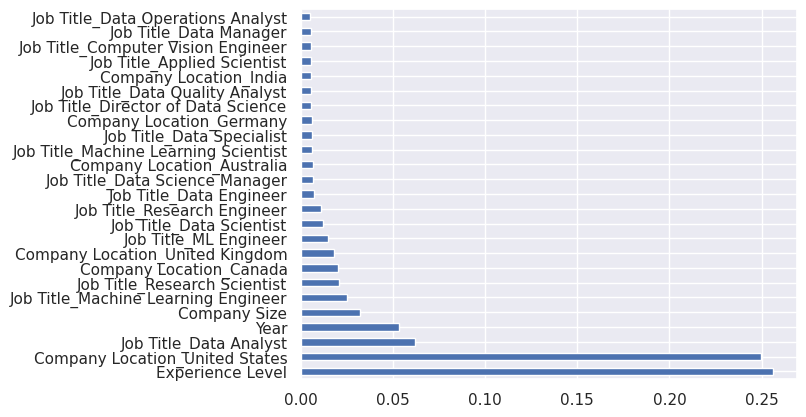

In [95]:
rfr.fit(X, y)
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')

As you can see, only a handful of the original 196 features have a significant impact on the out-of-sample predictions. We will kepep only the 25 most relevant features to tune the random forest algorithm and also play with the number of decision trees.

##### Random Forest: Tuning steps

In [110]:
L=list(feat_importances.nlargest(25).index)
data3=data2[L]

In [112]:
X=data3
y=data2['Salary in USD']
from scipy.stats.mstats import winsorize
y = winsorize(y, (0, 0.015))
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 465)

In [118]:
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
trainpreds = rfr.predict(X_train)
print('train error is:',np.sqrt(mean_squared_error(y_train, trainpreds))) 
print('test error is:', np.sqrt(mean_squared_error(y_test,pred)))

train error is: 47329.157709090556
test error is: 52267.51673361011


##### There is a lower gap between the training error and the test error. But the model does not perform better than SLR with Lasso regularizer.

## Conclusion

In conclusion, our project aims to address the pressing issue of the dynamic nature of data science salaries, which have evolved rapidly in recent years. By analyzing salary data from 2020 to 2023, we seek to provide valuable insights into salary trends within the field, benefiting job seekers, employers, and educational institutions.

Our project's value proposition lies in informed decision-making, allowing job seekers to negotiate fair compensation and aiding employers in making competitive salary offers. Moreover, organizations can benchmark their data science salary structures against industry standards, facilitating talent attraction and retention. Additionally, our findings may inform academic programs, aligning data science curricula with industry demands.

We plan to source our data from a variety of reputable sources, including job boards, industry reports, and professional organizations. Data cleaning and preprocessing will be essential to ensure data accuracy, and we will employ descriptive statistics, time series analysis, and machine learning techniques to gain insights and predict salary trends.

While we anticipate challenges, particularly regarding data quality and representativeness, we are committed to overcoming these obstacles to deliver accurate and actionable findings. Ultimately, our project seeks to provide a comprehensive understanding of the evolving data science salary landscape, supporting the growth and development of the field.